<center> <b> Laboratorio 4 </b> </center>

Los ejercicios están en el orden (1, 3, 2) <br>
Primero importamos todas las librerías necesarias para este laboratorio.

In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

<center> <b> Ejercicio # 1 </b> </center>

Para el primer ejercicio lo primero es diseñar una función corta que determine si el jugador ganó basado
en el número que recibe, si este número es >= a 52 devuelve verdarero y de lo contratio devuelve falso.

In [51]:
def gamewon(n):
    return n >= 52

print(gamewon(2))
print(gamewon(100))
print(gamewon(50))
print(gamewon(53))

False
True
False
True


Lo siguiente es hacer una función que simule un juego, esta función tiene que recibir la cantidad de
intentos X, el monto inicial del usuario y el monto por apuesta. Adicionalmente debe arrojar el balance final
del usuario. En cada iteración utilizaremos la función randint para simular el número que sacó el usuario.

In [52]:
def game_simulation(am, bet, n):
    states = []
    money = am
    won = 0
    lost = 0
    for i in range(0, n):
        x = random.randint(0, 100)
        if gamewon(x):
            won += 1
            money += bet
        else:
            lost += 1
            money -= bet
        states.append(money)
    print('W-L:' + str(won) + '-' + str(lost))
    print('Final Balance:' + str(money))
    series = pd.Series(states)
    series.plot()
    plt.show()

Ya con esto podemos llamar a la función, esta nos arroja la cantidad de ganadas/perdidas de la persona,
su balance final y un gráfico del balance de la persona a lo largo de los n intentos

W-L:50-50
Final Balance:10000


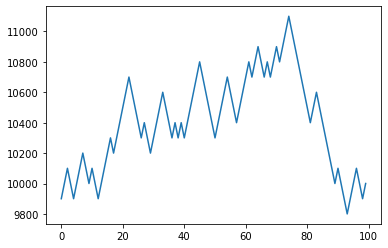

In [53]:
game_simulation(10000, 100, 100)

<center> <b> Ejercicio # 3 </b> </center>

Para el tercer ejercicio seguiremos el código de ejemplo del Catálogo Web, haciendo los cambios necesarios.

In [54]:
# Definimos la función
def gamma_s(x, b, c):
    num = x ** (c - 1)
    denom = math.gamma(c) * (b ** (c))
    exp = -x/b
    return (num / denom) ** exp


# Reutilizamos la función random coin
def random_coin(p):
    unif = random.uniform(0, 1)
    if unif >= p:
        return False
    else:
        return True

Replicamos el algoritmo de MCMC que utilizamos en el ejemplo, adaptandolo a la nueva función. <br>
Esta vez el espacio está definido en el intervalo de 0 a 20.

In [55]:
def gamma_mcmc(hops, b, c):
    states = []
    cur = random.uniform(0, 20)
    for i in range(0, hops):
        states.append(cur)
        next = random.uniform(0, 20)
        ap = min(1, gamma_s(next, b, c)/gamma_s(cur, b, c)) # Calculate the acceptance probability
        if random_coin(ap):
            cur = next
    return states[-1000:]

Una vez lista la función, ya podemos proceder a graficar. <br>
Es importante tener en cuenta que la función está definida para c, b > 0, por lo que utilizar c, b = 0
arroja un error.

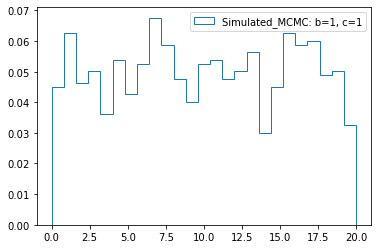

In [56]:
b, c = 1, 1

plt.hist(gamma_mcmc(1000, b, c),
         density=True,
         bins =25,
         histtype='step',
         label="Simulated_MCMC: b="+str(b)+", c="+str(c))
plt.legend()
plt.show()

<center> <b> Ejercicio # 2 </b> </center>

Para el segundo ejercicio seguiremos también el código de ejemplo del Catálogo Web,
haciendo los cambios necesarios. <br>
En este caso, ya que sólo nos interesa diferenciar entre la frase "Thank you" y las demás, podemos tratar a
todas las frases que siguen con "for" como un mismo estado. Así tendríamos 4 estados: <br>
* Start
* Thank you
* ...
* End

Definimos la matriz de estados y de transición (esta fue construida asumiendo que todas las frases
tenían la misma probabilidad de aparecer, por lo que cada frase representa un 0.2):

In [57]:
# The statespace
states = ["Start","Thank you","...", "End"]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.0, 1.0, 0.0, 0.0],
                    [0.0, 0.0, 0.8, 0.2],
                    [0.0, 0.0, 0.0, 1.0],
                    [0.0, 0.0, 0.0, 1.0]]

print(states[0])

Start


Diseñamos la funcion para implementar el generador de texto. El parametro modo define si la función va a
imprimir los resultados o a devolver el texto final.

In [58]:
def goodbye_generator(mode):
    # Iniciamos una cadena vacía para guardar la frase.
    prob = 1
    text = ''
    currentState = states[0]
    while currentState != "End":
        if currentState == "Start":
            change = np.random.choice(states, replace=True, p=transitionMatrix[0])
            if change == "Thank you":
                prob = prob * 1
                text += change
                currentState = "Thank you"
        elif currentState == "Thank you":
            change = np.random.choice(states, replace=True, p=transitionMatrix[1])
            if change == "End":
                prob = prob * 0.2
                currentState = "End"
            elif change == "...":
                prob = prob * 0.8
                text += ' ' + change
                currentState = "..."
        elif currentState == "...":
            change = np.random.choice(states, replace=True, p=transitionMatrix[2])
            if change == "End":
                prob = prob * 1
                currentState = "End"

    if mode == 1:
        print("End Result: " + text)
        print("Probability of the possible sequence of states: " + str(prob))
    else:
        return text

In [59]:
# Llamar a la funcion
goodbye_generator(mode=1)
goodbye_generator(mode=1)
goodbye_generator(mode=1)
goodbye_generator(mode=1)
goodbye_generator(mode=1)

End Result: Thank you ...
Probability of the possible sequence of states: 0.8
End Result: Thank you ...
Probability of the possible sequence of states: 0.8
End Result: Thank you ...
Probability of the possible sequence of states: 0.8
End Result: Thank you ...
Probability of the possible sequence of states: 0.8
End Result: Thank you
Probability of the possible sequence of states: 0.2


Podemos con esta función hallar la probabilidad "observada" haciendo 1000 simulaciones y viendo
cuantas de estas resultan en "Thank you". <br>
Para esta simulación utilizamos modo = 0, aunque como está definida la función, cualquier número <> 1
serviría.

In [60]:
ty = 0
n = 1000
for i in range(0, n):
    if goodbye_generator(mode=0) == "Thank you":
        ty += 1

print('Simulated probability: ' + str(ty/n))


Simulated probability: 0.208
